# HG002 IGH

In [3]:
import gzip
import lakeview as lv

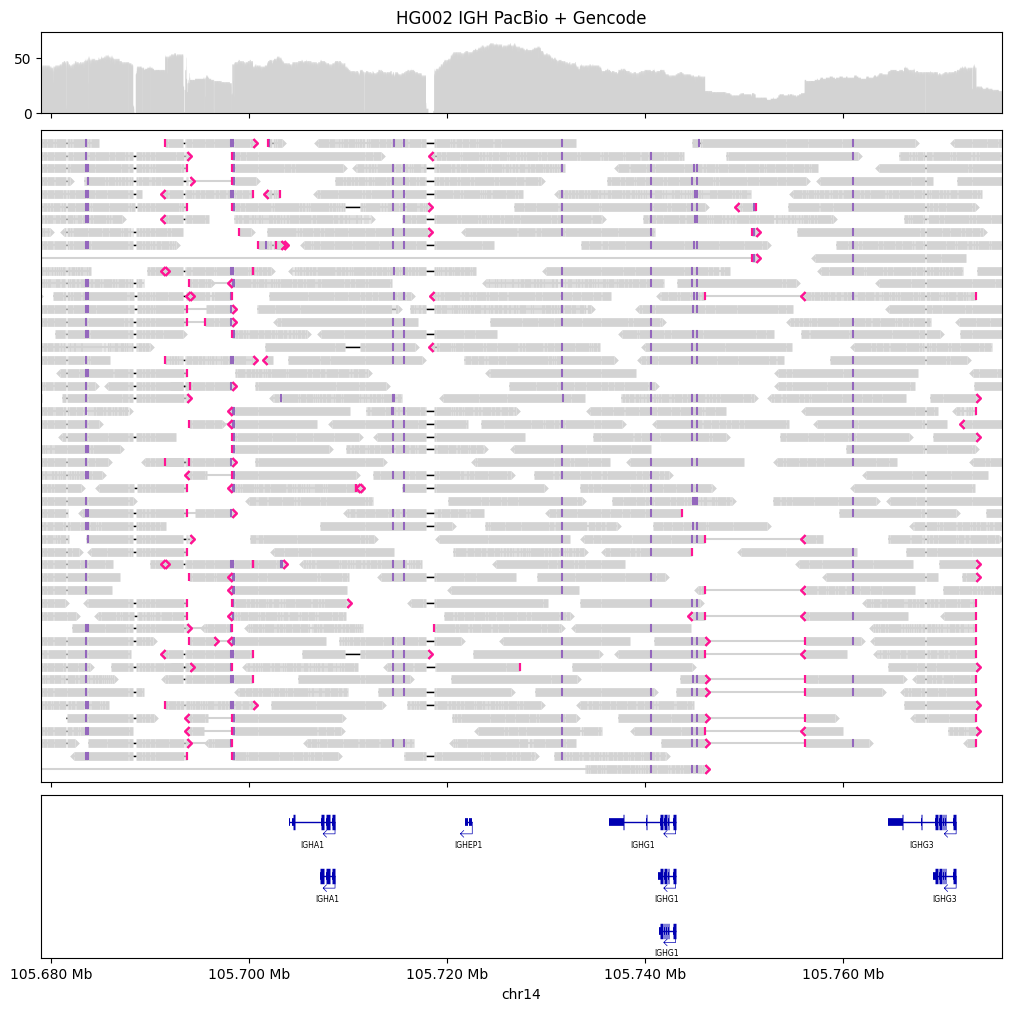

In [4]:
CHROMOSOME = "chr14"
VIEW_START = 105679000
VIEW_END = 105776000
START = VIEW_START - int(50e3)
END = VIEW_END + int(50e3)
GENCODE_GTF_PATH = "../../tests/data/gencode.v40.annotation.gtf.gz"
PACBIO_BAM_PATH = "../../tests/data/HG002_IGH_PacBio_CCS.bam"

with gzip.open(GENCODE_GTF_PATH, "rt") as f:
    gencode_painter = lv.GeneAnnotation.from_gencode(
        f, "gtf", region=(CHROMOSOME, (START, END))
    )
pacbio_painter = lv.SequenceAlignment.from_file(
    PACBIO_BAM_PATH, region=(CHROMOSOME, (START, END))
)
gv = lv.GenomeViewer(3, height_ratios=(1, 8, 2))
pacbio_painter.draw_pileup(
    gv.axes[0],
    show_mismatches=False,
)
pacbio_painter.draw_alignment(
    gv.axes[1],
    show_mismatches=False,
    sort_by="length",
    link_by="name",
    max_rows=50,
)
gencode_painter.draw_transcripts(gv.axes[2], max_rows=5, sort_by="length")

gv.set_xlim((VIEW_START, VIEW_END))
gv.set_xlabel(CHROMOSOME)
gv.set_title("HG002 IGH PacBio + Gencode")


In [5]:
gv

GenomeViewer(figure=<Figure size 1000x1000 with 3 Axes>)